# Experiments_with_Basic_Example_RNN_Model

Trains models on synthetic data .

In [1]:
import sys
sys.path.append('../..')

In [2]:
import tensorflow as tf
from numpy import arange
import tensorflow_datasets as tfds
from numpy import minimum, maximum, ndarray
from model_compra_comigo.data_handler import DataHandler
import matplotlib.pyplot as plt


2023-07-28 11:09:25.639962: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-28 11:09:25.689109: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-28 11:09:25.691747: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 11:09:26.797051: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from model_compra_comigo.data_handler import DataSimulator
from model_compra_comigo.data_handler import DataHandler

In [4]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


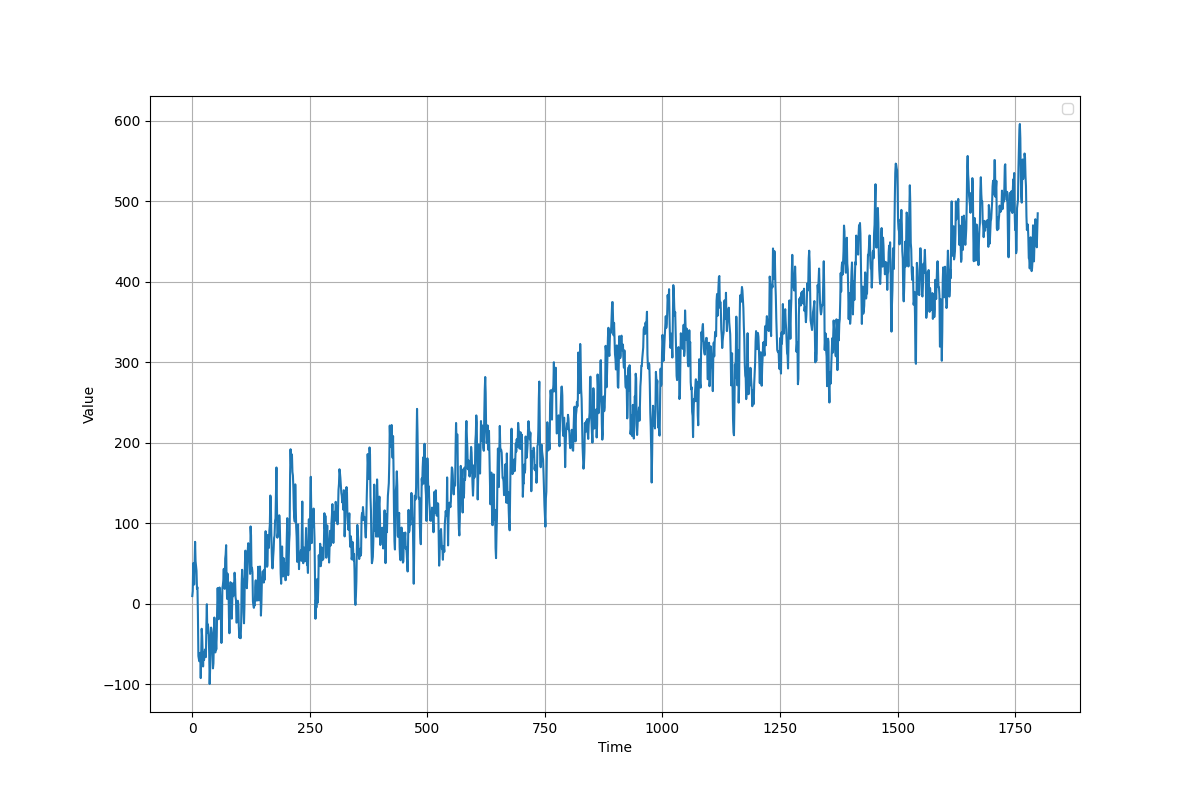

In [5]:
data_simulator = DataSimulator()
time_range = 1800
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)


## RNNExample Experiment

In [6]:
window_size = 60
batch_size = 32
nforecast = 30
shuffle_buffer_size = 1000
epochs = 10
split = int(time_range*0.9)


In [7]:
from model_compra_comigo.model import RNNExampleExperiment


In [8]:
rnne = RNNExampleExperiment()


In [9]:
generate_full_visualization=False

In [10]:
model = rnne.run(
    train_data =(time_data[:split], series[:split]),
    test_data = (time_data[split:], series[split:]),
    window_size = window_size,
    batch_size = batch_size,
    epochs = epochs,
    nforecast = nforecast,
    generate_full_visualization=generate_full_visualization
)


2023-07-28 11:09:30.102945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-28 11:09:30.105667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-28 11:09:30.107130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-07-28 11:09:31.433934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-28 11:09:31.436280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-28 11:09:31.437840: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

48/48 [==============================] - 6s 42ms/step - loss: 71635.7891 - mae: 234.4361 - mse: 71635.7891
Epoch 2/10
48/48 [==============================] - 2s 40ms/step - loss: 70759.6328 - mae: 232.6140 - mse: 70759.6328
Epoch 3/10
48/48 [==============================] - 2s 44ms/step - loss: 69950.3281 - mae: 230.9326 - mse: 69950.3281
Epoch 4/10
48/48 [==============================] - 2s 43ms/step - loss: 69212.9375 - mae: 229.3879 - mse: 69212.9375
Epoch 5/10
48/48 [==============================] - 2s 43ms/step - loss: 68484.5312 - mae: 227.8732 - mse: 68484.5312
Epoch 6/10
48/48 [==============================] - 2s 42ms/step - loss: 67761.7578 - mae: 226.3502 - mse: 67761.7578
Epoch 7/10
48/48 [==============================] - 2s 41ms/step - loss: 67037.3438 - mae: 224.8358 - mse: 67037.3438
Epoch 8/10
48/48 [==============================] - 2s 41ms/step - loss: 66333.6875 - mae: 223.3344 - mse: 66333.6875
Epoch 9/10
48/48 [==============================] - 2s 43ms/step - 

2023-07-28 11:10:16.798489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-28 11:10:16.800676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-28 11:10:16.802150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 19ms/step


2023-07-28 11:10:18.271912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [180]
	 [[{{node Placeholder/_0}}]]
2023-07-28 11:10:18.272444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [180]
	 [[{{node Placeholder/_0}}]]
2023-07-28 11:10:18.864221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' wi

INFO:tensorflow:Assets written to: ./tmp/model/assets


INFO:tensorflow:Assets written to: ./tmp/model/assets


In [11]:
mse = tf.keras.losses.MeanSquaredError()
mse(y_true, y_pred).numpy()


NameError: name 'y_true' is not defined

In [ ]:
model.get_summary()

In [ ]:
data = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)

In [ ]:
plots = []

data = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)

for i, example in enumerate(data):
    print(model.predict(example))
    print(i)
#     plot = DataHandler.plot_all(
#         series_lines = [
#             (time_data[maximum(0,index-gif_window):index+gif_window], series[maximum(0,index-gif_window):index+gif_window]),
#             (time_data[index:window_size+index], example.numpy()),
#         ],
#         series_points = [(time_data[index:window_size+index], forecast[i])],
#         labels_lines = ["series", "window"],
#         labels_points = ["forecast"],
#         xy_label = ["Time", "Value"],
#     )
#     plots.append(plot)
# plots[0]

In [ ]:
pr = model.predict(example)

In [ ]:
n = forecast.shape[0]
data = data_handler.generate_windowed_data_forecast(
    data = series,
    window_size = window_size,
    batch_size = batch_size,
)
plots = []
for i, example in enumerate(data):
    for j in range(0, n):
        index = i*batch_size+j
        X = list(time_data[minimum(window_size+index, len(time_data)):minimum(window_size+nforecast+index, len(time_data))])
        if not X:
            X = [time_data[-1]+1]
        if len(X) < nforecast:
            X = X + list(range(X[-1]+1, X[-1]+nforecast+1-len(X)))
        plot = DataHandler.plot_all(
            series_lines = [
                (time_data[maximum(0,index-gif_window):index+gif_window], series[maximum(0,index-gif_window):index+gif_window]),
                (time_data[index:window_size+index], data_np[j][i]),
            ],
            series_points = [(X, forecast[j])],
            labels_lines = ["series", "window"],
            labels_points = ["forecast"],
            xy_label = ["Time", "Value"],
        )
        plots.append(plot)


In [ ]:
forecast = rnne.model.predict(data=example.numpy())


In [ ]:
for p, l in pl:
    print(p.numpy())

In [ ]:
pl = DataHandler.generate_windowed_dataset(
    data = series[:split],
    window_size = window_size,
    batch_size = batch_size,
    shuffle_buffer_size=shuffle_buffer_size,
    nforecast = nforecast,
    shuffle=True,
)

In [ ]:
series[split:].shape